In [11]:
#Setup
import lightgbm as lgb
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from pmdarima import auto_arima
import pmdarima
from sklearn.metrics import mean_absolute_error, mean_squared_error

myfavouritenumber = 13
seed = myfavouritenumber
np.random.seed(seed)

                  Date  new cases with symptoms  Patients in ICU  PCR Tests
Date                                                                       
4/1/2020      4/1/2020                      101               83       3000
4/2/2020      4/2/2020                      115               90       3000
4/3/2020      4/3/2020                      106              107       3000
4/4/2020      4/4/2020                      215              129       3000
4/5/2020      4/5/2020                      145              146       3000
...                ...                      ...              ...        ...
11/6/2021    11/6/2021                      940              358      32742
11/7/2021    11/7/2021                      830              368      27918
11/8/2021    11/8/2021                      780              363      24931
11/9/2021    11/9/2021                      495              371      19146
11/10/2021  11/10/2021                      840              389      23723

[589 rows x

<AxesSubplot:xlabel='Date'>

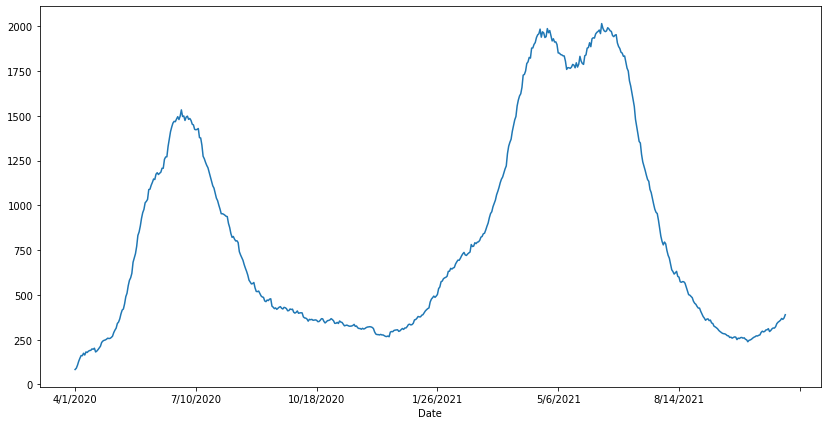

In [13]:
#Get data
#df = pd.read_csv("CombinedChileData.csv")
df = pd.read_csv("ChileDataSmall.csv")

#This is something that I think is important for time series, since it's all about order of elements
df.set_index("Date", drop=False, inplace=True)
print(df)
df.head()
df['Patients in ICU'].plot(figsize=(14,7))

In [14]:
print(df.Date)

Date
4/1/2020        4/1/2020
4/2/2020        4/2/2020
4/3/2020        4/3/2020
4/4/2020        4/4/2020
4/5/2020        4/5/2020
                 ...    
11/6/2021      11/6/2021
11/7/2021      11/7/2021
11/8/2021      11/8/2021
11/9/2021      11/9/2021
11/10/2021    11/10/2021
Name: Date, Length: 589, dtype: object


In [16]:
#Create Date
df.Date = pd.to_datetime(df.Date, format="%m/%d/%Y")

In [17]:
#Dates of predictions 14 days before
dates14DaysBefore=['5/6/2020','5/8/2020','5/10/2020','5/12/2020','5/14/2020','5/16/2020','5/18/2020','5/20/2020','5/22/2020','5/24/2020','5/26/2020','5/28/2020','5/30/2020','6/2/2020','6/4/2020','6/6/2020','6/8/2020','6/10/2020','6/12/2020','6/14/2020','6/16/2020','6/18/2020','6/19/2020','6/23/2020','6/26/2020','6/30/2020','7/3/2020','7/7/2020','7/10/2020','7/14/2020']

dates7DaysBefore=['5/13/2020','5/15/2020','5/17/2020','5/19/2020','5/21/2020','5/23/2020','5/25/2020','5/27/2020','5/29/2020','5/31/2020','6/2/2020','6/4/2020','6/6/2020','6/9/2020','6/11/2020','6/13/2020','6/15/2020','6/17/2020','6/19/2020','6/21/2020','6/23/2020','6/25/2020','6/26/2020','6/30/2020','7/3/2020','7/7/2020','7/10/2020','7/14/2020','7/17/2020','7/21/2020']

actualDates=['5/20/2020','5/22/2020','5/26/2020','5/28/2020','5/30/2020','6/1/2020','6/3/2020','6/5/2020','6/7/2020','6/9/2020','6/11/2020','6/13/2020','6/16/2020','6/18/2020','6/20/2020','6/22/2020','6/24/2020','6/26/2020','6/28/2020','6/30/2020','7/2/2020','7/3/2020','7/7/2020','7/10/2020','7/14/2020','7/17/2020','7/21/2020','7/24/2020','7/28/2020']

correctValues=[705,771,851,927,977,1022,1088,1112,1147,1174,1172,1185,1207,1271,1372,1437,1469,1482,1479,1533,1499,1493,1498,1453,1422,1376,1260,1185,1109,1026]

In [56]:
#This was is inferior to the next one I did slightly differently 
#Originally I had PCR tests, but paper mentions they only used 'new cases with symptoms' for arimax
# exogenous_features = ["new cases with symptoms"]
# predictionFor14Days = []
# count=0
# for date in dates14DaysBefore:
#     #Seporate into data that came before as training, and future data as 'valid' or 'testing'
#     df_train = df[df.Date < date]
#     df_valid = df[df.Date >= date]
    
#     #Creates basic arimax model
#     model = auto_arima(df_train['Patients in ICU'], exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
#     #Fits the model
#     model.fit(df_train['Patients in ICU'], exogenous=df_train[exogenous_features])
#     #Predicts the next 14 values
#     forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
#     #takes the 14th value as we're predicting for day 14 days in future
#     predictionFor14Days.append(forecast[13])
#     count=count+1
# print(predictionFor14Days)

c
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=748.446, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=729.542, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 5.654 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=587.093, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=758.137, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=750.153, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=806.511, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=597.387, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 

In [18]:
#Along with previous values they used 'exogenous feature' of new cases with symptoms to help predict the number of ICU beds
exogenous_features = ["new cases with symptoms"]
predictionFor14Days = []
count=0
for date in dates14DaysBefore:
    #Seporate into data that came 14 days before as training, and future data as 'valid'
    df_train = df[df.Date < date]
    df_valid = df[df.Date >= date]


    #Alternative way with SARIMAX, I think this is needed for predicitions to be accuate.
    sxmodel=auto_arima(df_train['Patients in ICU'], exogenous=df_train[exogenous_features], start_p=1, start_q=1, d=2, test='adf',max_p=2, max_q=10,error_action="ignore",trace=True, suppress_warnings=True,stepwise=True)

    sxmodel.fit(df_train['Patients in ICU'], exogenous=df_train[exogenous_features])
    #Predicts the next 14 values
    forecast = sxmodel.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
    #takes the 14th value as we're predicting for day 14 days in future
    predictionFor14Days.append(forecast[13])
    count=count+1
    print(predictionFor14Days)

3.371, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=575.761, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=586.590, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=576.745, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=572.761, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=594.295, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=572.355, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=582.858, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=573.693, Time=0.45 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=575.043, Time=0.48 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=576.214, Time=0.51 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=573.106, Time=0.35 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0] intercept
Total fit time: 4.653 seconds
[405.97914982094125, 432.90074893606413, 652.4100545439821, 528.2655220056282, 427.38571980994067, 789.5444396272848, 781.9010

In [19]:
#Along with previous values they used 'exogenous feature' of new cases with symptoms to help predict the number of ICU beds
exogenous_features = ["new cases with symptoms"]
predictionFor7Days = []
count=0
for date in dates7DaysBefore:
    #Seporate into data that came 14 days before as training, and future data as 'valid'
    df_train = df[df.Date < date]
    df_valid = df[df.Date >= date]


    #Alternative way with SARIMAX, I think this is needed for predicitions to be accuate.
    sxmodel=auto_arima(df_train['Patients in ICU'], exogenous=df_train[exogenous_features], start_p=1, start_q=1, test='adf',max_p=2, max_q=10,error_action="ignore",trace=True, suppress_warnings=True,stepwise=True)

    sxmodel.fit(df_train['Patients in ICU'], exogenous=df_train[exogenous_features])
    #Predicts the next 14 values
    forecast = sxmodel.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
    #takes the 14th value as we're predicting for day 14 days in future
    predictionFor7Days.append(forecast[6])
    count=count+1
    print(predictionFor14Days)

c
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=736.810, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=665.216, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=659.944, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=679.594, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=660.558, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=655.710, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=666.809, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=656.468, Time=0.48 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=659.547, Time=0.47 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=657.945, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=659.951, Time=0.42 sec

Best model:  ARIMA(1,1,3)(0,0,0)[0] intercept
Total fit time: 4.948 seconds
[405.97914982094125, 432.90074893606413, 652.4100545439821, 528.2655220056282, 427.38571980994067, 789.5444396272848, 781.9010247412928, 426.3208

In [20]:
total = 0
for i in range(0,len(predictionFor14Days)):
    error = abs((correctValues[i] - predictionFor14Days[i])/correctValues[i])
    print(error)
    total=total+error
finalError=(total/len(predictionFor14Days))*100
print("The mean error was " + str(finalError) + "%")

0.4241430498993741
0.43852042939550695
0.23336068796241816
0.430134280468578
0.5625529991709922
0.22745162463083682
0.28134096990690005
0.6166179014228819
0.5922919003693143
0.15279738986328567
0.6806922318083979
0.34821591996704676
0.14923256837404308
0.10188624044612457
0.3837255827089891
0.031415874887067874
0.05389754433339358
0.11094286307451721
0.08713720954435987
0.0932046198366081
0.1666043056576827
0.10677460743432832
0.11050996389539156
0.16261473102649524
0.18940330565315192
0.2340502931207293
0.3095491462767304
0.37237093127670945
0.33634283994144026
0.3969092190037438
The mean error was 27.94897077119013%
